In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv('titanic.csv',usecols=['Survived','Fare','Age'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [6]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [7]:
a = df.columns

In [8]:
a

Index(['Survived', 'Age', 'Fare'], dtype='object')

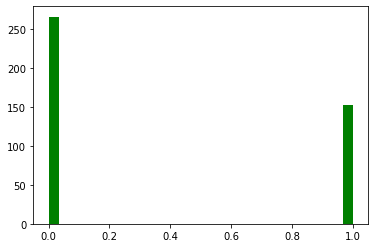

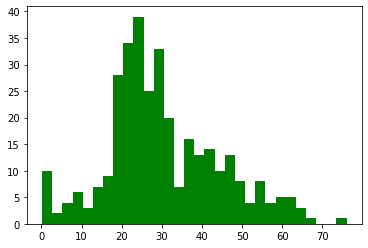

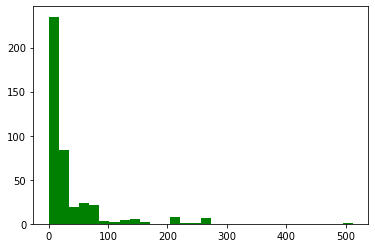

In [9]:
for i in a:
    plt.hist(df[i],color='g',bins=30)
    plt.show()

<AxesSubplot:>

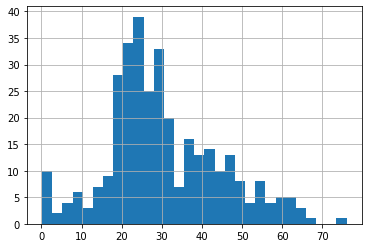

In [10]:
df['Age'].hist(bins=30)

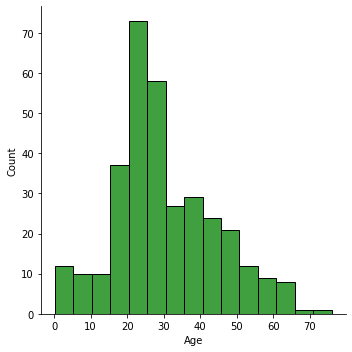

In [11]:
sns.displot(df['Age'],color='g')

In [12]:
value=df['Age'].mean() + 3 * df['Age'].std()

In [13]:
value

72.81621806831905

In [14]:
def ND(df,var,value):
    df[var+'_std']=df[var].fillna(value)

In [15]:
ND(df,"Age",value)

In [16]:
df.head()

,Survived,Age,Fare,Age_std
0,0,34.5,7.8292,34.5
1,1,47.0,7.0000,47.0
2,0,62.0,9.6875,62.0
3,0,27.0,8.6625,27.0
4,1,22.0,12.2875,22.0


In [17]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
Age_std      0
dtype: int64

<AxesSubplot:>

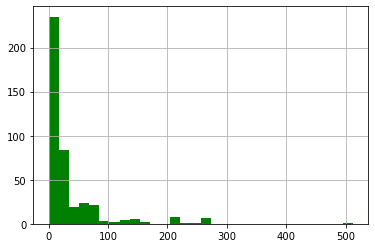

In [18]:
df['Fare'].hist(bins=30,color='g')

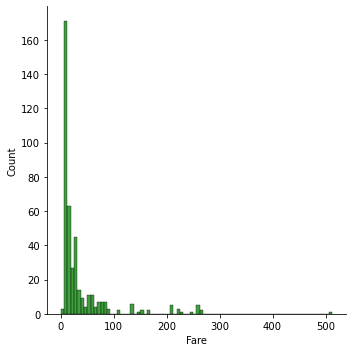

In [19]:
sns.displot(df['Fare'],color='g')

In [20]:
IQR=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)

In [21]:
IQR

23.6042

In [22]:
value_Fare=df['Fare'].quantile(0.75) + 3 * IQR
value_Fare

102.3126

In [23]:
value_Fare_1=df['Fare'].quantile(0.75) + 1.5 * IQR
value_Fare_1

66.9063

In [24]:
def Ak(df,var,value_Fare):
    df[var+'_Fare_replaced']=df[var].fillna(value_Fare)

In [25]:
Ak(df,'Fare',value_Fare)

In [26]:
df.isnull().sum()

Survived               0
Age                   86
Fare                   1
Age_std                0
Fare_Fare_replaced     0
dtype: int64

# UsingFeature Engine

In [27]:
df=pd.read_csv('titanic.csv',usecols=['Survived','Fare','Age'])

In [28]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [29]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [30]:
from feature_engine.imputation import EndTailImputer

In [31]:
reg=EndTailImputer(imputation_method = 'gaussian', tail = 'right')

In [32]:
reg.fit(df)

EndTailImputer()

In [33]:
reg.variables_

['Survived', 'Age', 'Fare']

In [34]:
reg.imputer_dict_

{'Survived': 1.8085027864330554,
 'Age': 72.81621806831905,
 'Fare': 203.3499170291301}

In [35]:
a=df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)

In [36]:
a

23.6042

In [37]:
b=df['Fare'].quantile(0.25) -3 * IQR

In [38]:
b

-62.9168

In [39]:
df['Survived'].mean() + 3 * df['Survived'].std()

1.8085027864330554

In [40]:
df['Age'].mean() + 3 * df['Age'].std()

72.81621806831905

In [41]:
data = reg.transform(df)

In [42]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64